In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
df_gene = pd.read_csv("g-data.csv")
df_meta = pd.read_csv('meta-data.csv')

In [3]:
# DATA CLEANING

# fill S21 null value with mean.
x = x.fillna(x['S21'].mean())

#drop symbol and serial no. 
x = x.drop(['symbol', 'Unnamed: 0'], axis=1)

In [8]:
#Scale the DATA
scaled_data = preprocessing.scale(x.T)

# create PCA
pca = PCA()

#fit scaled data
pca.fit(scaled_data) 

# Transform on Principal Components
pca_data = pca.transform(scaled_data) 

# PCA TRANSFORMED DATA SHAPE
pca_data.shape

/home/deepak/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(30, 30)

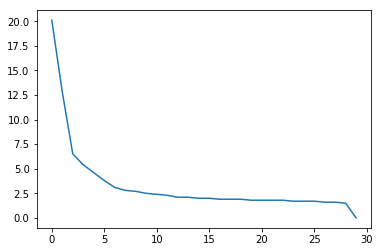

In [9]:
var1 = np.round(pca.explained_variance_ratio_* 100, decimals=1)

plt.plot(var1)

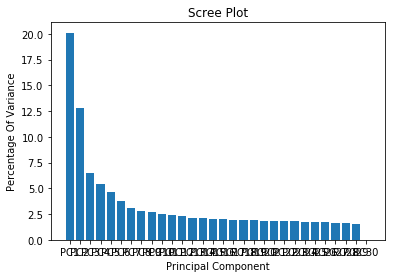

In [10]:
#The following code constructs the Scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(var1)+1), height=var1, tick_label=labels)
plt.ylabel('Percentage Of Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 

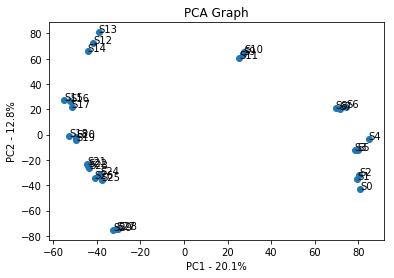

In [11]:
# Now, draw the PC1 and PC2 axis graph
pca_df = pd.DataFrame(pca_data, index=['S' + str(x) for x in range(30)], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

Text(0,0.5,'Sample')

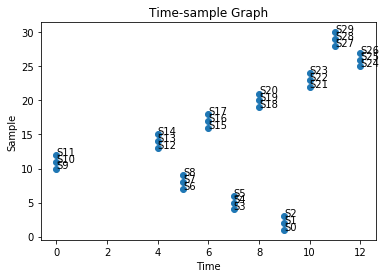

In [49]:
x1 = np.arange(1, 31)

plt.scatter(df_meta.Time, x1)

for i in range(30):
    plt.annotate('S' + str(i), ((df_meta.Time)[i], x1[i]))


plt.title('Time-sample Graph')
plt.xlabel('Time')
plt.ylabel('Sample')